<h2 style="color:blue" align="left"> 1. Load Data </h2>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('/kaggle/input/weight-height/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.shape

(10000, 3)

In [5]:
df.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

In [6]:
df.count()

Gender    10000
Height    10000
Weight    10000
dtype: int64

In [7]:
df['Gender'].value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

<h2 style="color:blue" align="left"> 2. Missing Values </h2>

In [8]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

<h2 style="color:blue" align="left"> 3. EDA(Exploratory Data Analysis) </h2>

In [9]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [10]:
a = pd.DataFrame(df['Weight'])
b = pd.DataFrame(df['Height'])

In [11]:
import statsmodels.api as sms
model = sms.OLS(b,a).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                          4.726e+05
Date:                Mon, 01 Jun 2020   Prob (F-statistic):                        0.00
Time:                        15:32:17   Log-Likelihood:                         -36774.
No. Observations:               10000   AIC:                                  7.355e+04
Df Residuals:                    9999   BIC:                                  7.356e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Weight         0.3997      0.001    687.489      0.000       0.399       0.401
==============================================================================
Omnibus:                      980.306   Durbin-Watson:                   0.671
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              288.234
Skew:                          -0.020   Prob(JB):                     2.57e-63
Kurtosis:                       2.169   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

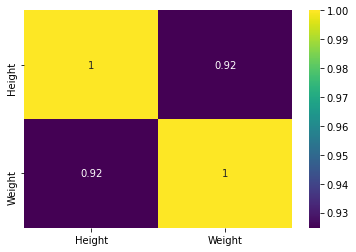

In [12]:
sns.heatmap(df.corr(), annot=True, cmap='viridis')

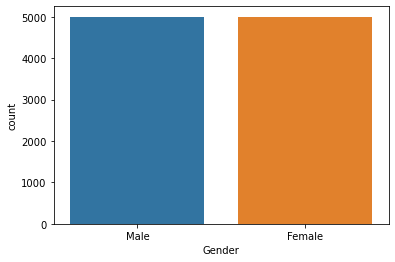

In [13]:
sns.countplot(df.Gender)

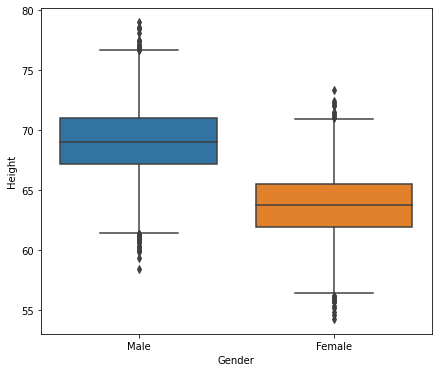

In [14]:
plt.figure(figsize=(7,6))
sns.boxplot(x='Gender', y='Height', data=df)

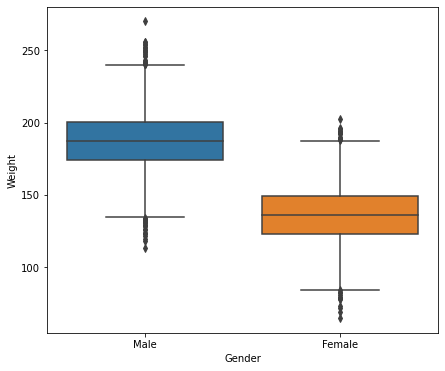

In [15]:
plt.figure(figsize=(7,6))
sns.boxplot(x='Gender', y='Weight', data=df)

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


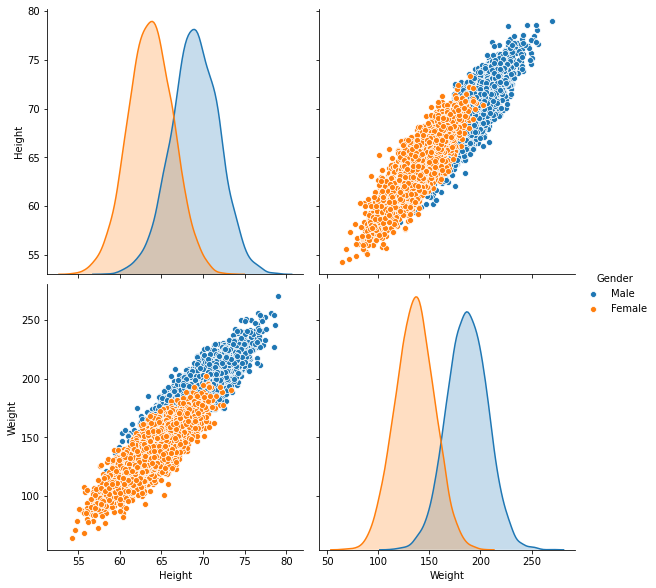

In [16]:
sns.pairplot(df, hue='Gender', size=4)

<h2 style="color:green" align="left"> Univariate Analysis ---->  plotting only a single feature </h2>

### a. histogram

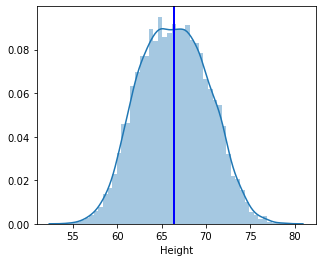

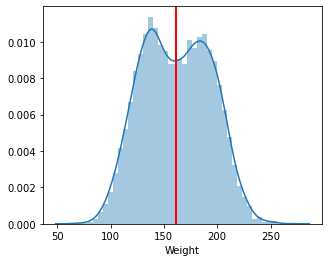

In [17]:
plt.figure(figsize=(5, 4))
sns.distplot(df['Height']);
plt.axvline(df['Height'].mean(),color='blue',linewidth=2)

plt.figure(figsize=(5, 4))
sns.distplot(df['Weight']);
plt.axvline(df['Weight'].mean(),color='red',linewidth=2)

In [18]:
plt.figure(figsize=(7,6))
males['Height'].plot(kind='hist',bins=50, alpha=0.3,color='blue')
females['Height'].plot(kind='hist',bins=50, alpha=0.3,color='red')
plt.title('Height distribution')
plt.legend(['Males','Females'])
plt.xlabel('Height in')
plt.axvline(males['Height'].mean(),color='blue',linewidth=2)
plt.axvline(females['Height'].mean(),color='red',linewidth=2);

NameError: name 'males' is not defined

<Figure size 504x432 with 0 Axes>


### b. kde plot (kernel distribution estimation)

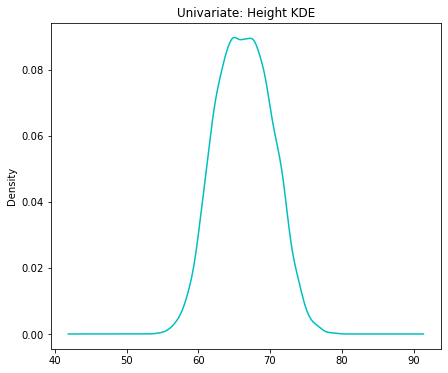

In [19]:
plt.figure(figsize=(7,6))
df.Height.plot(kind="kde", title='Univariate: Height KDE', color='c');

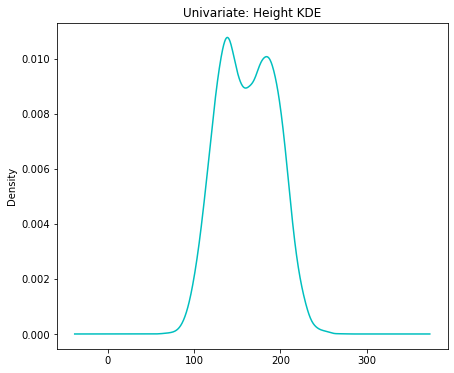

In [20]:
plt.figure(figsize=(7,6))
df.Weight.plot(kind="kde", title='Univariate: Height KDE', color='c');

### c. Boxplot

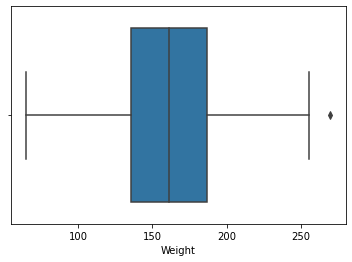

In [21]:
sns.boxplot(df.Weight)

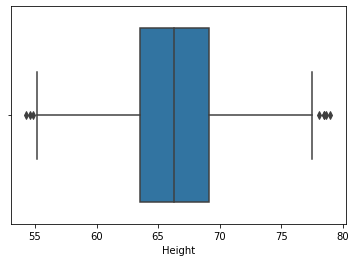

In [22]:
sns.boxplot(df.Height)


<h2 style="color:green" align="left"> Bivariate Analysis ---->  plotting two variables </h2>

###         a. Scatter plot

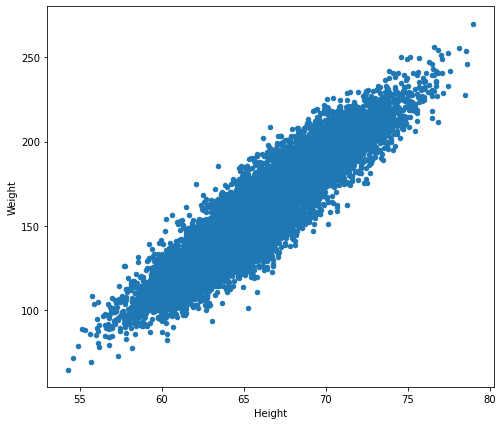

In [23]:
df.plot(figsize=(8,7), kind='scatter',x='Height',y='Weight');

- From above graph observed, there is a linear relationship b/n Height and Weight. As height increases weight also increases.

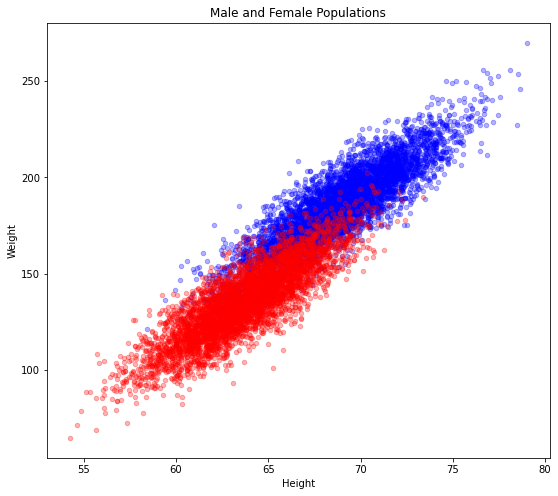

In [24]:
males=df[df['Gender']=='Male']
females=df[df['Gender']=='Female']
fig,ax = plt.subplots()
males.plot(figsize=(9,8), kind='scatter', x='Height', y='Weight', ax=ax, color='blue',alpha=0.3, title='Male and Female Distribution')
females.plot(figsize=(9,8), kind='scatter', x='Height', y='Weight', ax=ax, color='red', alpha=0.3, title='Male and Female Populations');

- Observed from graph, compared to men womens are less height and weight.

<h2 style="color:green" align="left"> Outliers </h2>

<h3 style='color:purple'> 1. Detect outliers using IQR </h3>
### Height

In [25]:
Q1 = df.Height.quantile(0.25)
Q3 = df.Height.quantile(0.75)
Q1, Q3

(63.505620481218955, 69.1742617268347)

In [26]:
IQR = Q3 - Q1
IQR

5.668641245615746

In [27]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(55.00265861279534, 77.67722359525831)

- Here are the outliers

In [28]:
df[(df.Height<lower_limit)|(df.Height>upper_limit)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


### Remove ouliers from Height column

In [29]:
df_no_outlier_height = df[(df.Height>lower_limit)&(df.Height<upper_limit)]
df_no_outlier_height

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


### Weight

In [30]:
Q1 = df.Weight.quantile(0.25)
Q3 = df.Weight.quantile(0.75)
Q1, Q3

(135.8180513055015, 187.16952486868348)

In [31]:
IQR = Q3 - Q1
IQR

51.35147356318197

In [32]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(58.79084096072856, 264.19673521345646)

In [33]:
df[(df.Height<lower_limit)|(df.Height>upper_limit)]

,Gender,Height,Weight
4794,Male,58.406905,121.338323
5014,Female,58.438249,98.192621
5026,Female,56.547975,84.872124
5074,Female,56.159458,90.815256
5122,Female,57.103869,93.506316
...,...,...,...
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551
9913,Female,58.351003,110.122151
9922,Female,58.752489,106.846041


### Remove ouliers from Height column

In [34]:
df_no_outlier_Weight = df[(df.Height>lower_limit)&(df.Height<upper_limit)]
df_no_outlier_Weight

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<h2 style="color:blue" align="left"> Data Preprocessing </h2>

### Converting Categorical Variables to Numeric by using Pandas get_Dummies

In [35]:
df[['Female','Male']] = pd.get_dummies(df['Gender'])
df.head()

,Gender,Height,Weight,Female,Male
0,Male,73.847017,241.893563,0,1
1,Male,68.781904,162.310473,0,1
2,Male,74.110105,212.740856,0,1
3,Male,71.730978,220.042470,0,1
4,Male,69.881796,206.349801,0,1


In [36]:
df.drop('Gender',axis=1,inplace=True)

In [37]:
df.head()

,Height,Weight,Female,Male
0,73.847017,241.893563,0,1
1,68.781904,162.310473,0,1
2,74.110105,212.740856,0,1
3,71.730978,220.042470,0,1
4,69.881796,206.349801,0,1


### Standard Scalar

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

NameError: name 'X_train' is not defined

In [39]:
X = df.drop('Height',axis=1)
y = df['Height']

### Train the model

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [41]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 3) (2000, 3) (8000,) (2000,)


### Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
y_pred = LinReg.predict(X_test)
y_pred

array([63.97801621, 69.07096077, 72.64788738, ..., 65.73574039,
       66.95413365, 66.44526544])

In [44]:
y_test

9394    64.723877
898     67.272171
2398    74.520972
5906    65.880014
2343    64.846301
          ...    
1037    69.084897
2899    71.860625
9549    66.071107
2740    65.641536
6690    64.210866
Name: Height, Length: 2000, dtype: float64

In [45]:
LinReg.score(X_test, y_test)

0.864642597342521

In [46]:
print(LinReg.coef_)
print(LinReg.intercept_)

[ 0.1226242   0.47483909 -0.47483909]
46.570516363759296


In [47]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_pred)

0.864642597342521

In [48]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.4139618621562908

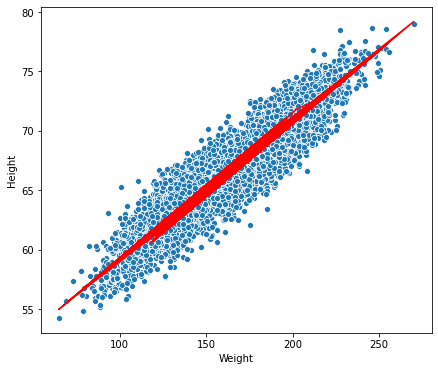

In [49]:
plt.figure(figsize=(7,6))
sns.scatterplot(X_train.Weight, y_train)
plt.plot(X_train.Weight, LinReg.predict(X_train), c='r')

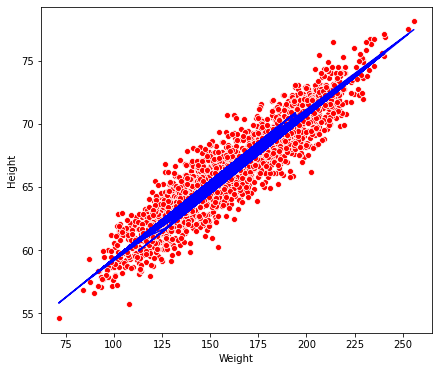

In [50]:
plt.figure(figsize=(7,6))
sns.scatterplot(X_test.Weight, y_test,color='r')
plt.plot(X_test.Weight,y_pred, c='b')

### Decision Tree

In [51]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

In [52]:
model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [53]:
model.predict(X_test)

array([62.61769   , 69.50522934, 70.60240884, ..., 64.9365559 ,
       66.25215051, 64.89581901])

In [54]:
model.score(X_test, y_test)

0.7225552627347791

In [55]:
from sklearn.linear_model import LogisticRegression
Log = LogisticRegression()

In [56]:
Output = pd.DataFrame(X_test['Weight'], y_test)
Output

,Weight
Height,
64.723877,NaN
67.272171,NaN
74.520972,NaN
65.880014,NaN
64.846301,NaN
...,...
69.084897,NaN
71.860625,NaN
66.071107,NaN
